In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
from datetime import date
import time

/usr/local/lib/python3.4/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
df = pd.read_csv('kiwi_final_dataset.csv')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


create separate column for dep 'year'

In [3]:
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'])
df['year'] = df.scheduled_departure.dt.year

Data columns 'sched_departure_date','scheduled_departure','lat_degrees','lng_degrees' are not required, so drop them.

In [4]:
df.drop(['sched_departure_date','scheduled_departure','lat_degrees','lng_degrees'], axis=1, inplace=True)

## Data Exploration

For temperature and weather, we have many rows with zero values bcoz information not available. We try to replace with mean values.

In [5]:
df1 = deepcopy(df)

In [6]:
df1.loc[df1.weather=='0', 'weather'] = df1.weather.mode()[0]
df1.loc[df1.temperature==0.0, 'temperature'] = df1.temperature.mean()

### Feature Variables
carrier        
fltno          
dep_apt        
arr_apt             
dayofweek      
dayofmonth     
month          
is_holiday     
dep_hour       
dep_min        
weather        
temperature    
year    
### Target Variable
delay_time (In minutes)

Now we dont have any missing values

In [7]:
df1.isnull().any()

carrier        False
fltno          False
dep_apt        False
arr_apt        False
delay_time     False
dayofweek      False
dayofmonth     False
month          False
is_holiday     False
dep_hour       False
dep_min        False
weather        False
temperature    False
year           False
dtype: bool

In [8]:
df1.head()

,carrier,fltno,dep_apt,arr_apt,delay_time,dayofweek,dayofmonth,month,is_holiday,dep_hour,dep_min,weather,temperature,year
0,7I,773,CUR,MAO,1345.0,4,29,4,no,20,50,partly-cloudy-day,85.990,2016
1,AA,1361,PBI,PHL,986.0,4,29,4,no,15,55,partly-cloudy-day,77.070,2016
2,AA,137,DFW,HKG,278.0,4,29,4,no,7,50,partly-cloudy-night,71.860,2016
3,AA,4173,LGA,STL,0.0,4,29,4,no,17,10,partly-cloudy-night,52.165,2016
4,AA,5202,GNV,CLT,131.0,4,29,4,no,17,50,partly-cloudy-day,75.125,2016


Basic statistics of numerical variables

In [10]:
df1.describe()

,delay_time,dayofweek,dayofmonth,month,dep_hour,dep_min,temperature,year
count,476859.00000,476859.000000,476859.000000,476859.000000,476859.000000,476859.000000,476859.000000,476859.0
mean,26.27557,2.559077,3.665589,4.937854,13.351697,26.453113,62.320175,2016.0
std,84.32242,2.684386,6.820593,0.241421,5.029911,17.870952,13.523005,0.0
min,0.00000,0.000000,1.000000,4.000000,0.000000,0.000000,17.515000,2016.0
25%,0.00000,0.000000,1.000000,5.000000,9.000000,10.000000,50.985000,2016.0
50%,0.00000,1.000000,2.000000,5.000000,13.000000,25.000000,60.153260,2016.0
75%,14.00000,6.000000,3.000000,5.000000,17.000000,40.000000,72.765000,2016.0
max,2659.00000,6.000000,30.000000,5.000000,23.000000,59.000000,100.955000,2016.0


Explore categorical variables

In [ ]:
df1.carrier.unique()
df1.dep_apt.value_counts()
df1.weather.value_counts()
df1.is_holiday.value_counts()
df1.arr_apt.value_counts()
df1.fltno.value_counts()

### Plot distributions

#### Find relation between departure airport and average delay time

check top 10 airports with maximum average delay times

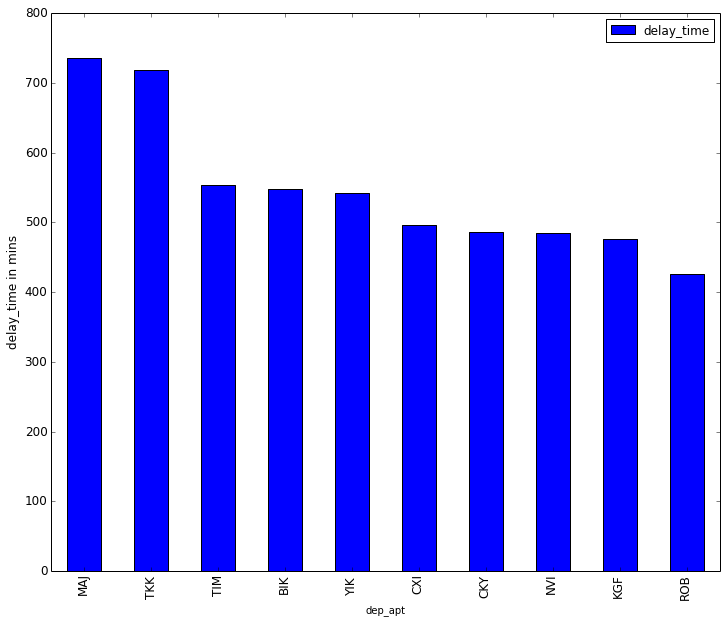

In [11]:
temp = df1[['dep_apt','delay_time']].groupby('dep_apt').mean().sort_values(by='delay_time',ascending=False).head(10)
temp.plot.bar(figsize=(12, 10), legend=True, fontsize=12)
plt.ylabel('delay_time in mins', fontsize=12)

plot top 20 airports with max no of flights operating

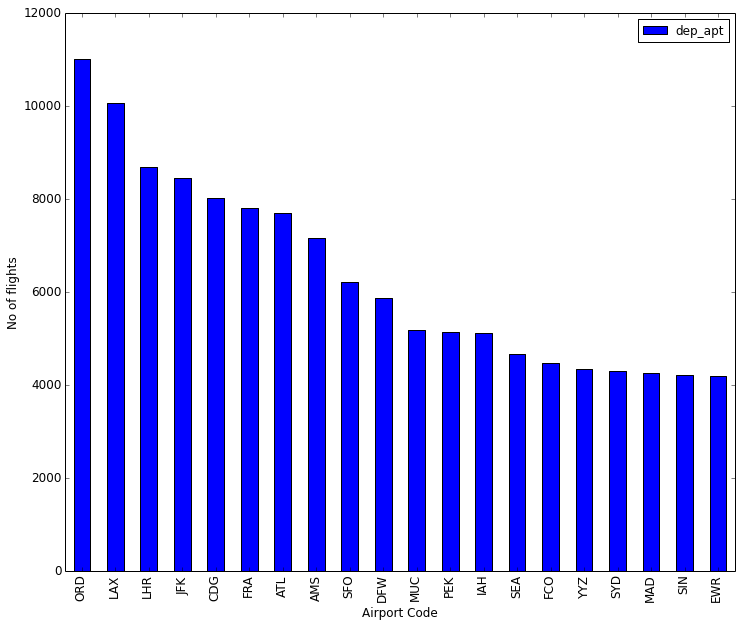

In [12]:
df1.dep_apt.value_counts().head(20).plot.bar(figsize=(12, 10), legend=True, fontsize=12)
plt.xlabel('Airport Code', fontsize=12)
plt.ylabel('No of flights', fontsize=12)

Find top airlines/carrier with max average delay

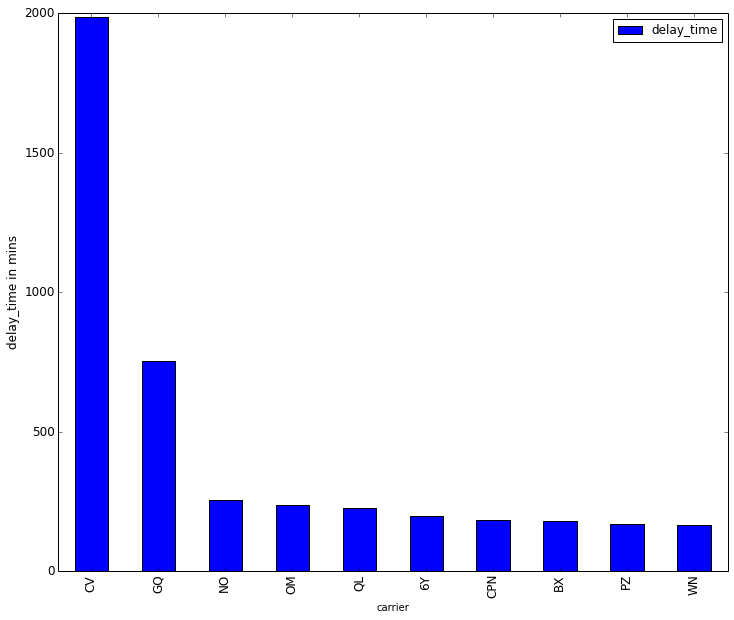

In [13]:
temp = df1[['carrier','delay_time']].groupby('carrier').mean().sort_values(by='delay_time',ascending=False).head(10)
temp.plot.bar(figsize=(12, 10), legend=True, fontsize=12)
plt.ylabel('delay_time in mins', fontsize=12)

Find relation between Weather and average delay time

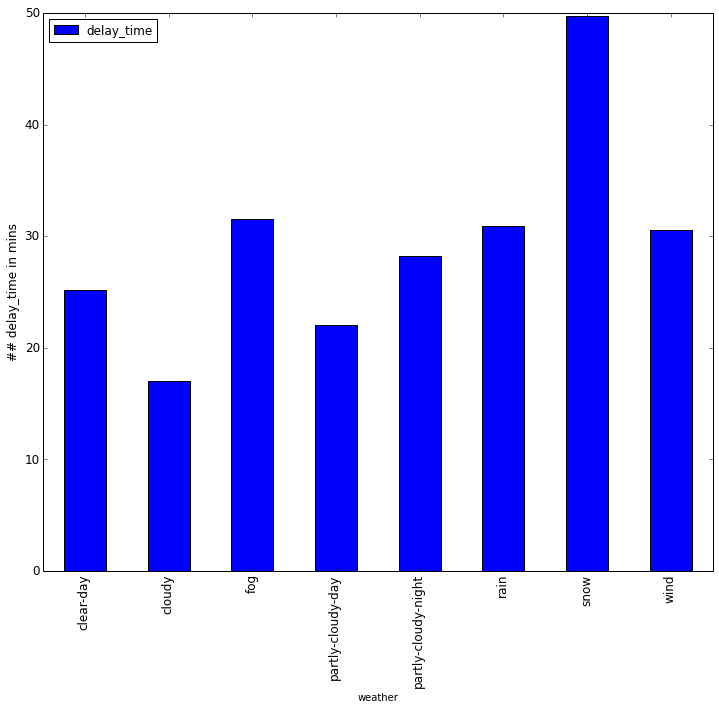

In [14]:
df1[['weather','delay_time']].groupby('weather').mean().plot.bar(figsize=(12, 10), legend=True, fontsize=12)
plt.ylabel('## delay_time in mins', fontsize=12)

Plot average delay_time in every hour

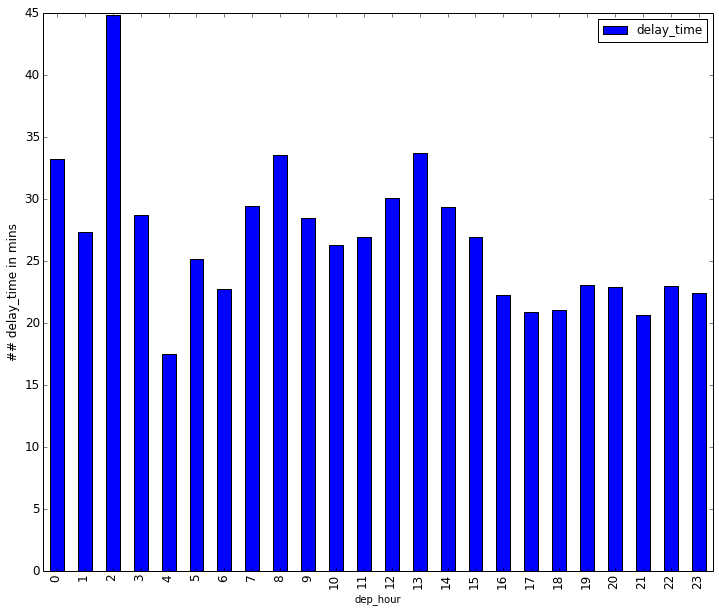

In [15]:
df1[['dep_hour','delay_time']].groupby('dep_hour').mean().plot.bar(figsize=(12, 10), legend=True, fontsize=12)
plt.ylabel('## delay_time in mins', fontsize=12)

## Feature Engineering

#### Please note that I have already dropped few columns before..

#### Drop fltno, arr_apt, year columns

In [16]:
df1.drop(['fltno', 'arr_apt', 'year'], axis=1, inplace=True)

#### Numerical and One-Hot Coding of Categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder
df_new = deepcopy(df1)
df_new[['carrier','dep_apt']] = df_new[['carrier','dep_apt']].apply(LabelEncoder().fit_transform)

In [18]:
df_new.head()

,carrier,dep_apt,delay_time,dayofweek,dayofmonth,month,is_holiday,dep_hour,dep_min,weather,temperature
0,33,375,1345.0,4,29,4,no,20,50,partly-cloudy-day,85.990
1,52,1280,986.0,4,29,4,no,15,55,partly-cloudy-day,77.070
2,52,412,278.0,4,29,4,no,7,50,partly-cloudy-night,71.860
3,52,958,0.0,4,29,4,no,17,10,partly-cloudy-night,52.165
4,52,600,131.0,4,29,4,no,17,50,partly-cloudy-day,75.125


In [13]:
one_hot = pd.get_dummies(df_new.is_holiday)
df_new = df_new.join(one_hot)
df_new.drop('is_holiday',axis=1, inplace=True)

In [19]:
one_hot_weather = pd.get_dummies(df_new.weather)
df_new = df_new.join(one_hot_weather)
df_new.drop('weather',axis=1, inplace=True)

In [20]:
df_new.head()

,carrier,dep_apt,delay_time,dayofweek,dayofmonth,month,is_holiday,dep_hour,dep_min,temperature,clear-day,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind
0,33,375,1345.0,4,29,4,no,20,50,85.990,0,0,0,1,0,0,0,0
1,52,1280,986.0,4,29,4,no,15,55,77.070,0,0,0,1,0,0,0,0
2,52,412,278.0,4,29,4,no,7,50,71.860,0,0,0,0,1,0,0,0
3,52,958,0.0,4,29,4,no,17,10,52.165,0,0,0,0,1,0,0,0
4,52,600,131.0,4,29,4,no,17,50,75.125,0,0,0,1,0,0,0,0


## Random Forest Regression Model

#### Split data in 70% train set and 30% test set.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

train, test = train_test_split(df_new, test_size = 0.3)

#Define target:
target = 'delay_time'

## Define target variable and dropping unwanted features
y  = df_new[target]
x =  df_new.drop(target,axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [44]:
%%time
random_reg = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 50)
random_reg.fit(x_train, y_train)

CPU times: user 5min 39s, sys: 76 ms, total: 5min 39s
Wall time: 1min 30s


#### Find feature importance

In [45]:
for feature_imp in random_reg.feature_importances_:
    print("%s" %("{0:.8%}".format(feature_imp)))

31.32018382%
16.70862249%
1.17420853%
2.78372506%
2.11247554%
21.90277677%
4.76532725%
14.52445681%
0.27305622%
0.26665103%
1.82790649%
0.00215078%
0.21650383%
0.48981406%
0.14231790%
1.05912744%
0.02070190%
0.40999408%


In [46]:
y_pred = random_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

77.137891449612994

Extract important features

In [22]:
x_train_imp = x_train[['carrier', 'dep_apt', 'dayofmonth', 'dep_hour', 'dep_min', 'temperature']]
x_test_imp = x_test[['carrier', 'dep_apt', 'dayofmonth', 'dep_hour', 'dep_min', 'temperature']]

we modify min_sample_leaf=1 and see some improvement in results 

In [23]:
%%time
random_reg1 = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 1)
random_reg1.fit(x_train_imp, y_train)

CPU times: user 7min 48s, sys: 2.64 s, total: 7min 51s
Wall time: 2min 13s


In [24]:
y_pred_imp = random_reg1.predict(x_test_imp)
np.sqrt(mean_squared_error(y_test, y_pred_imp))

66.525761782186763

#### GridsearchCV to improve Randomforest regressor

In [ ]:
from sklearn.grid_search import GridSearchCV

In [25]:
param_grid = { 
    'n_estimators': [200, 500, 700],
    'max_depth': [None, 1, 2, 3],
     'min_samples_split': [2, 3, 4],
     'min_samples_leaf':[1, 200]
}
CV_rfc = GridSearchCV(estimator=random_reg1, param_grid=param_grid)

In [ ]:
CV_rfc.fit(x_train_imp, y_train)
CV_rfc.best_params_

#### xgboost regressor for faster execution

In [25]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=500, learning_rate=0.5, max_depth=7, subsample=0.75, nthread=4)
xgb_reg.fit(x_train_imp, y_train)

/home/RISHI/.local/lib/python3.4/site-packages/xgboost-0.6-py3.4.egg/xgboost/sklearn.py:210: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [26]:
y_pred_imp = xgb_reg.predict(x_test_imp)
np.sqrt(mean_squared_error(y_test, y_pred_imp))

66.967430320095545

Tuning hyperparameters

In [ ]:
parameters = {
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [3, 4, 5],
        'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0],
    }